In [2]:
import random
import numpy as np
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras import optimizers

In [33]:
np.random.seed(867)
N = 5000
x1 = np.random.normal(0, 1, N)
x2 = np.random.normal(0, 1, N)
x3 = np.random.normal(0, 1, N)
x4 = np.random.randint(1, 5, N)
x5 = np.random.normal(0, 1, N)
x6 = np.random.randint(1, 5, N)
d = {'x1': x1, 'x2': x2, 'x3': x3,'x4': x4,'x5': x5,'x6': x6}
df = pd.DataFrame(data=d)
df.head()

,x1,x2,x3,x4,x5,x6
0,-0.154005,0.197094,0.123579,4,-1.023316,1
1,-1.069379,1.314449,-2.132584,3,0.256518,2
2,0.161591,0.503896,1.493674,2,0.631397,2
3,0.029792,-0.061004,-0.568154,2,-1.651640,2
4,-1.079196,0.091550,-0.817524,1,-0.372353,2


In [34]:
df=pd.get_dummies(df, columns=["x4","x6"])
df.head()

,x1,x2,x3,x5,x4_1,x4_2,x4_3,x4_4,x6_1,x6_2,x6_3,x6_4
0,-0.154005,0.197094,0.123579,-1.023316,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,-1.069379,1.314449,-2.132584,0.256518,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.161591,0.503896,1.493674,0.631397,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.029792,-0.061004,-0.568154,-1.651640,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-1.079196,0.091550,-0.817524,-0.372353,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [35]:
for i in range(11):
    for j in np.arange(i+1,12):
            inter = df.iloc[:,i]*df.iloc[:,j]
            df = pd.concat([df, inter], axis=1)
df.head()

,x1,x2,x3,x5,x4_1,x4_2,x4_3,x4_4,x6_1,x6_2,...,0,0,0,0,0,0,0,0,0,0
0,-0.154005,0.197094,0.123579,-1.023316,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.069379,1.314449,-2.132584,0.256518,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.161591,0.503896,1.493674,0.631397,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.029792,-0.061004,-0.568154,-1.651640,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-1.079196,0.091550,-0.817524,-0.372353,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
x4_1 = df.iloc[:,4]
x4_2 = df.iloc[:,5]
x4_3 = df.iloc[:,6]
x4_4 = df.iloc[:,7]
## main effect for x1-x4
main_effect = [0.3,0.1,0.1,0.1,0.2,0.3,0.4]
## interaction between x1 and x2, x3 and x4
inter_effect = [1,0.5,1,2,3]

In [37]:
main_matrix = np.column_stack((x1,x2**2,0.5*np.exp(x3),x4_1,x4_2,x4_3,x4_4))
inter_matrix = np.column_stack((x1*x2**2,0.5*np.exp(x3)*x4_1,0.5*np.exp(x3)*x4_2,0.5*np.exp(x3)*x4_3,0.5*np.exp(x3)*x4_4))

In [38]:
eta_wo_intercept = np.dot(main_matrix,main_effect) + np.dot(inter_matrix,inter_effect)
intercept = -np.mean(eta_wo_intercept)
np.random.seed(867)
eps = np.random.normal(0, 1, N)
eta = eta_wo_intercept + intercept + eps
p = np.exp(eta)/(1+np.exp(eta))
y = np.zeros(N)
y[p>0.5]=1

In [51]:
### LASSO with logistic regression
lam=5
logistic = LogisticRegression(penalty='l1',tol=1e-5,C=1/lam,fit_intercept=True,intercept_scaling=1e6,max_iter=1e5)
result = logistic.fit(df,y)
useful_index = np.where(logistic.coef_!= 0)[1]
num_main = sum(useful_index<=11)
useful_index

array([ 0,  1,  2,  3,  4,  5,  7,  9, 12, 13, 15, 23, 25, 27, 28, 31, 32,
       34, 36, 37, 39, 40, 43, 62], dtype=int64)

In [52]:
x=df.iloc[:,useful_index]
x.head()

,x1,x2,x3,x5,x4_1,x4_2,x4_4,x6_2,0,0,...,0,0,0,0,0,0,0,0,0,0
0,-0.154005,0.197094,0.123579,-1.023316,0.0,0.0,1.0,0.0,-0.030353,-0.019032,...,0.197094,0.0,0.0,0.000000,0.000000,0.123579,0.000000,0.0,-0.000000,0.0
1,-1.069379,1.314449,-2.132584,0.256518,0.0,0.0,0.0,1.0,-1.405644,2.280539,...,0.000000,0.0,0.0,-0.000000,-2.132584,-0.000000,-2.132584,-0.0,0.000000,0.0
2,0.161591,0.503896,1.493674,0.631397,0.0,1.0,0.0,1.0,0.081425,0.241364,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,1.493674,0.0,0.631397,0.0
3,0.029792,-0.061004,-0.568154,-1.651640,0.0,1.0,0.0,1.0,-0.001817,-0.016926,...,-0.000000,-0.0,-0.0,-0.000000,-0.000000,-0.000000,-0.568154,-0.0,-1.651640,0.0
4,-1.079196,0.091550,-0.817524,-0.372353,1.0,0.0,0.0,1.0,-0.098800,0.882269,...,0.000000,0.0,0.0,-0.817524,-0.000000,-0.000000,-0.817524,-0.0,-0.000000,0.0


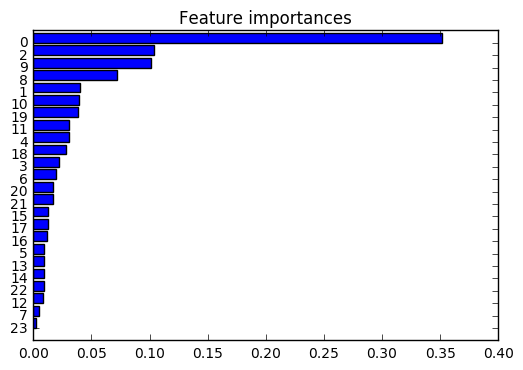

In [53]:
## random forest to see the importance
forest = ExtraTreesClassifier(n_estimators=20, random_state=0)
forest.fit(x, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)
plt.figure()
plt.title("Feature importances")
plt.barh(range(x.shape[1]), importances[indices])
plt.yticks(range(x.shape[1]), indices)
plt.ylim([-1, x.shape[1]])
plt.show()

In [54]:
inter_prop = 1-sum(importances[range(num_main)])
inter_prop

0.41791571187276522

In [55]:
## with interaction
x = np.array(x)
y = np.array(y)
model1 = Sequential()
model1.add(Dense(10, input_dim=np.shape(x)[1], activation='relu'))
model1.add(Dense(5, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
trace1 = model1.fit(x[0:4000,:], y[0:4000],epochs=50,batch_size=64,verbose=0)
score1 = model1.evaluate(x[4000:5000,:], y[4000:5000], batch_size=64)

1000/1000 [==============================] - 1s 1ms/step


In [56]:
score1

[0.051221471033990384, 0.98199999999999998]

In [57]:
min(np.where(np.transpose(trace1.history['acc'])>0.95)[0])

8

In [58]:
## without interaction
x = np.array(x)
y = np.array(y)
model2 = Sequential()
model2.add(Dense(10, input_dim=num_main, activation='relu'))
model2.add(Dense(5, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
trace2 = model2.fit(x[0:4000,0:num_main], y[0:4000],epochs=50,batch_size=64,verbose=0)
score2 = model2.evaluate(x[4000:5000,0:num_main], y[4000:5000], batch_size=64)

1000/1000 [==============================] - 1s 1ms/step


In [59]:
score2

[0.10075744140148163, 0.96000000095367433]

In [60]:
min(np.where(np.transpose(trace2.history['acc'])>0.95)[0])

22

In [47]:
## Finally, put all things together, assume there is a shrinkage factor t for the interaction effect
## we vary t from 0 to 1 with grid level 0.05, and we expect the importance of interaction term increase
np.random.seed(867)
lam=5  ## tuning parameter in LASSO
max_epoch = 100
table = np.zeros((21,6))
for i in range(21):
    t = 0.05*i
    inter_effect = np.array([1,0.5,1,2,3])*t
    eta_wo_intercept = np.dot(main_matrix,main_effect) + np.dot(inter_matrix,inter_effect)
    intercept = -np.mean(eta_wo_intercept)
    eps = np.random.normal(0, 1, N)
    eta = eta_wo_intercept + intercept + eps
    p = np.exp(eta)/(1+np.exp(eta))
    y = np.zeros(N)
    y[p>0.5]=1
    m = LogisticRegression(penalty='l1',tol=1e-5,C=1/lam,fit_intercept=True,intercept_scaling=1e6,max_iter=1e5)
    m.fit(df,y)
    inter_prop = 1-sum((np.array(np.std(df, 0))*abs(m.coef_))[0][0:11])/sum((np.array(np.std(df, 0))*abs(m.coef_))[0])
    useful_index = np.where(m.coef_!= 0)[1]
    num_main = sum(useful_index<=11)
    num_inter = len(useful_index) - num_main
    x=df.iloc[:,useful_index]
    #forest = ExtraTreesClassifier(n_estimators=20, random_state=0)
    #forest.fit(x, y)
    #importances = forest.feature_importances_
    #std = np.std([tree.feature_importances_ for tree in forest.estimators_],axis=0)
    #inter_prop = 1-sum(importances[range(num_main)])
    x = np.array(x)
    y = np.array(y)
    model1 = Sequential()
    model1.add(Dense(30, input_dim=np.shape(x)[1], activation='tanh'))
    model1.add(Dense(1, activation='sigmoid'))
    sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    model1.compile(loss='binary_crossentropy',optimizer=sgd, metrics=['accuracy'])
    trace1 = model1.fit(x[0:4000,:], y[0:4000],epochs=max_epoch,batch_size=64,verbose=0)
    score1 = model1.evaluate(x[4000:5000,:], y[4000:5000], batch_size=64)
    model2 = Sequential()
    model2.add(Dense(30, input_dim=num_main, activation='tanh'))
    model2.add(Dense(1, activation='sigmoid'))
    model2.compile(loss='binary_crossentropy',optimizer=sgd, metrics=['accuracy'])
    trace2 = model2.fit(x[0:4000,0:num_main], y[0:4000],epochs=max_epoch,batch_size=64,verbose=0)
    score2 = model2.evaluate(x[4000:5000,0:num_main], y[4000:5000], batch_size=64)
    best_acc = np.transpose(trace2.history['acc'])[70]
    step2 = min(np.where(np.transpose(trace2.history['acc'])>=best_acc)[0])
    if len(np.where(np.transpose(trace1.history['acc'])>=best_acc)[0])==0:
        step1 = max_epoch
    else:
        step1 = min(np.where(np.transpose(trace1.history['acc'])>=best_acc)[0])
    table[i,:]=np.array([i,num_inter,inter_prop,step2-step1,score1[1],score2[1]])

  64/1000 [>.............................] - ETA: 33s

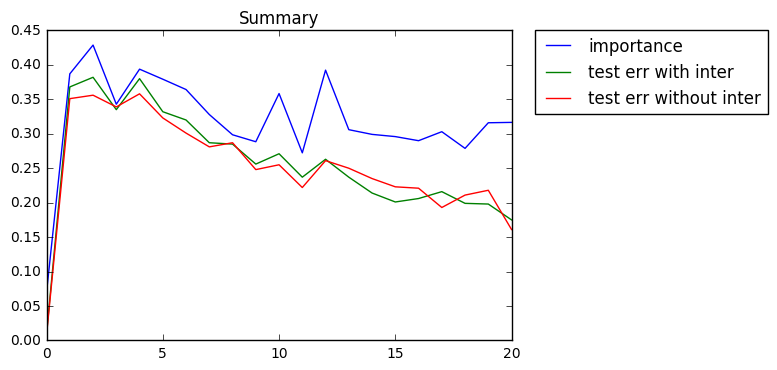

In [51]:
plt.title('Summary')
plt.plot(table[:,0],table[:,2],label='importance')
plt.plot(table[:,0],1-table[:,4],label='test err with inter')
plt.plot(table[:,0],1-table[:,5],label='test err without inter')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

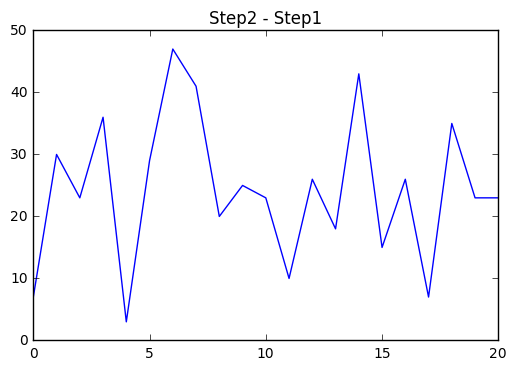

In [52]:
plt.title('Step2 - Step1')
plt.plot(table[:,0],table[:,3])
plt.show()

In [20]:
#### remove all the irrelavant variables, do a simplified simulation
np.random.seed(867)
N = 5000
x1 = np.random.normal(0, 1, N)
x2 = np.random.normal(0, 1, N)
x3 = np.random.normal(0, 1, N)
x4 = np.random.randint(1, 5, N)
d = {'x1': x1, 'x2': x2, 'x3': x3,'x4': x4}
df = pd.DataFrame(data=d)
df = pd.get_dummies(df, columns=["x4"])
x4_1 = df.iloc[:,3]
x4_2 = df.iloc[:,4]
x4_3 = df.iloc[:,5]
x4_4 = df.iloc[:,6]
df['inter1'] = pd.Series((x1*x2-np.mean(x1*x2))/np.std(x1*x2), index=df.index)
df['inter2'] = pd.Series((x4_1*x3-np.mean(x4_1*x3))/np.std(x4_1*x3), index=df.index)
df['inter3'] = pd.Series((x4_2*x3-np.mean(x4_2*x3))/np.std(x4_2*x3), index=df.index)
df['inter4'] = pd.Series((x4_3*x3-np.mean(x4_3*x3))/np.std(x4_3*x3), index=df.index)
df['inter5'] = pd.Series((x4_4*x3-np.mean(x4_4*x3))/np.std(x4_4*x3), index=df.index)
main_effect = [0.3,0.1,0.1,0.1,0.2,0.3,0.4]
main_matrix = np.column_stack((x1,x2**2,0.5*np.exp(x3),x4_1,x4_2,x4_3,x4_4))
inter_matrix = np.column_stack((x1*x2**2,0.5*np.exp(x3)*x4_1,0.5*np.exp(x3)*x4_2,0.5*np.exp(x3)*x4_3,0.5*np.exp(x3)*x4_4))
df.head()

,x1,x2,x3,x4_1,x4_2,x4_3,x4_4,inter1,inter2,inter3,inter4,inter5
0,-0.154005,0.197094,0.123579,0.0,0.0,0.0,1.0,-0.012515,0.008493,0.006318,0.039944,0.261018
1,-1.069379,1.314449,-2.132584,0.0,0.0,1.0,0.0,-1.369655,0.008493,0.006318,-4.231714,0.009344
2,0.161591,0.503896,1.493674,0.0,1.0,0.0,0.0,0.097788,0.008493,2.955005,0.039944,0.009344
3,0.029792,-0.061004,-0.568154,0.0,1.0,0.0,0.0,0.015644,0.008493,-1.115285,0.039944,0.009344
4,-1.079196,0.091550,-0.817524,1.0,0.0,0.0,0.0,-0.080059,-1.654195,0.006318,0.039944,0.009344


In [26]:
np.random.seed(867)
max_epoch = 100
table = np.zeros((11,5))
for i in range(11):
    t = 0.2*i
    inter_effect = np.array([1,0.5,1,2,3])*t
    eta_wo_intercept = np.dot(main_matrix,main_effect) + np.dot(inter_matrix,inter_effect)
    intercept = -np.mean(eta_wo_intercept)
    eps = np.random.normal(0, 1, N)
    eta = eta_wo_intercept + intercept + eps
    p = np.exp(eta)/(1+np.exp(eta))
    y = np.zeros(N)
    y[p>0.5]=1
    #forest = ExtraTreesClassifier(n_estimators=20, random_state=0)
    #forest.fit(df, y)
    #importances = forest.feature_importances_
    #std = np.std([tree.feature_importances_ for tree in forest.estimators_],axis=0)
    #inter_prop = 1-sum(importances[range(7)])
    x = np.array(df)
    y = np.array(y)
    m = LogisticRegression()
    m.fit(x, y)
    inter_prop = 1-sum((np.std(x, 0)*abs(m.coef_))[0][0:6])/sum((np.std(x, 0)*abs(m.coef_))[0])
    model1 = Sequential()
    model1.add(Dense(20, input_dim=np.shape(x)[1], activation='tanh'))
    model1.add(Dense(1, activation='sigmoid'))
    sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    model1.compile(loss='binary_crossentropy',optimizer=sgd, metrics=['accuracy'])
    trace1 = model1.fit(x[0:4000,:], y[0:4000],epochs=max_epoch,batch_size=64,verbose=0)
    score1 = model1.evaluate(x[4000:5000,:], y[4000:5000], batch_size=64)
    model2 = Sequential()
    num_main = 7
    model2.add(Dense(20, input_dim=num_main, activation='tanh'))
    model2.add(Dense(1, activation='sigmoid'))
    model2.compile(loss='binary_crossentropy',optimizer=sgd, metrics=['accuracy'])
    trace2 = model2.fit(x[0:4000,0:num_main], y[0:4000],epochs=max_epoch,batch_size=64,verbose=0)
    score2 = model2.evaluate(x[4000:5000,0:num_main], y[4000:5000], batch_size=64)
    best_acc = np.transpose(trace2.history['acc'])[70]
    step2 = min(np.where(np.transpose(trace2.history['acc'])>=best_acc)[0])
    if len(np.where(np.transpose(trace1.history['acc'])>=best_acc)[0])==0:
        step1 = max_epoch
    else:
        step1 = min(np.where(np.transpose(trace1.history['acc'])>=best_acc)[0])
    table[i,:]=np.array([i,inter_prop,step2-step1,score1[1],score2[1]])

  64/1000 [>.............................] - ETA: 14s

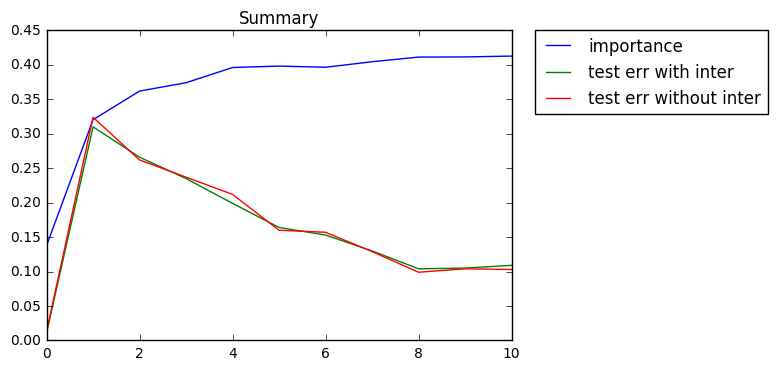

In [27]:
plt.title('Summary')
plt.plot(table[:,0],table[:,1],label='importance')
plt.plot(table[:,0],1-table[:,3],label='test err with inter')
plt.plot(table[:,0],1-table[:,4],label='test err without inter')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

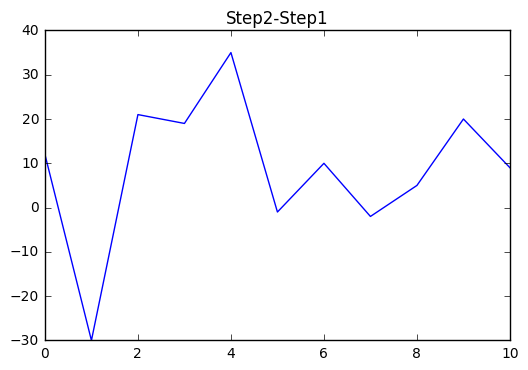

In [28]:
plt.title('Step2-Step1')
plt.plot(table[:,0],table[:,2])
plt.show()

In [29]:
## zoom in 0-2
np.random.seed(867)
max_epoch = 100
table = np.zeros((11,5))
for i in range(11):
    t = 0.02*i
    inter_effect = np.array([1,0.5,1,2,3])*t
    eta_wo_intercept = np.dot(main_matrix,main_effect) + np.dot(inter_matrix,inter_effect)
    intercept = -np.mean(eta_wo_intercept)
    eps = np.random.normal(0, 1, N)
    eta = eta_wo_intercept + intercept + eps
    p = np.exp(eta)/(1+np.exp(eta))
    y = np.zeros(N)
    y[p>0.5]=1
    #forest = ExtraTreesClassifier(n_estimators=20, random_state=0)
    #forest.fit(df, y)
    #importances = forest.feature_importances_
    #std = np.std([tree.feature_importances_ for tree in forest.estimators_],axis=0)
    #inter_prop = 1-sum(importances[range(7)])
    x = np.array(df)
    y = np.array(y)
    m = LogisticRegression()
    m.fit(x, y)
    inter_prop = 1-sum((np.std(x, 0)*abs(m.coef_))[0][0:6])/sum((np.std(x, 0)*abs(m.coef_))[0])
    model1 = Sequential()
    model1.add(Dense(20, input_dim=np.shape(x)[1], activation='tanh'))
    model1.add(Dense(1, activation='sigmoid'))
    sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    model1.compile(loss='binary_crossentropy',optimizer=sgd, metrics=['accuracy'])
    trace1 = model1.fit(x[0:4000,:], y[0:4000],epochs=max_epoch,batch_size=64,verbose=0)
    score1 = model1.evaluate(x[4000:5000,:], y[4000:5000], batch_size=64)
    model2 = Sequential()
    num_main = 7
    model2.add(Dense(20, input_dim=num_main, activation='tanh'))
    model2.add(Dense(1, activation='sigmoid'))
    model2.compile(loss='binary_crossentropy',optimizer=sgd, metrics=['accuracy'])
    trace2 = model2.fit(x[0:4000,0:num_main], y[0:4000],epochs=max_epoch,batch_size=64,verbose=0)
    score2 = model2.evaluate(x[4000:5000,0:num_main], y[4000:5000], batch_size=64)
    best_acc = np.transpose(trace2.history['acc'])[70]
    step2 = min(np.where(np.transpose(trace2.history['acc'])>=best_acc)[0])
    if len(np.where(np.transpose(trace1.history['acc'])>=best_acc)[0])==0:
        step1 = max_epoch
    else:
        step1 = min(np.where(np.transpose(trace1.history['acc'])>=best_acc)[0])
    table[i,:]=np.array([i,inter_prop,step2-step1,score1[1],score2[1]])

  64/1000 [>.............................] - ETA: 17s

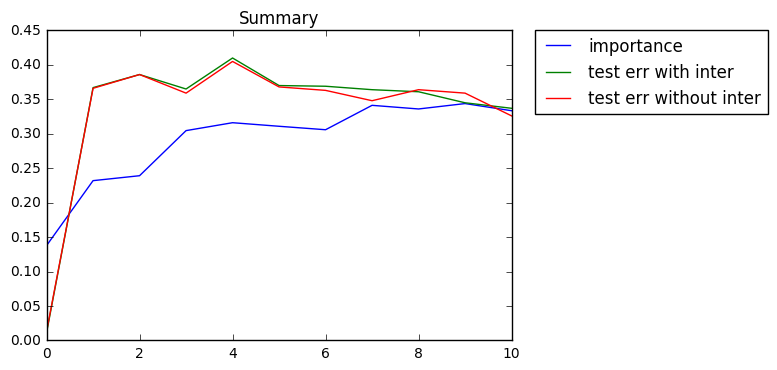

In [30]:
plt.title('Summary')
plt.plot(table[:,0],table[:,1],label='importance')
plt.plot(table[:,0],1-table[:,3],label='test err with inter')
plt.plot(table[:,0],1-table[:,4],label='test err without inter')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

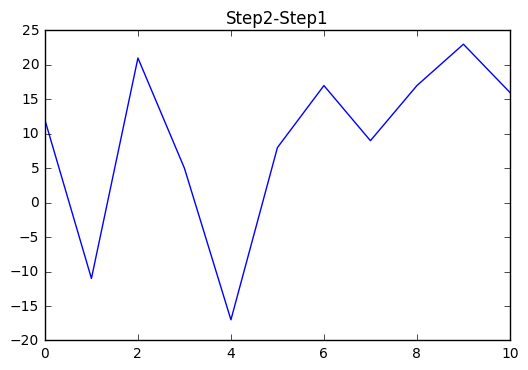

In [31]:
plt.title('Step2-Step1')
plt.plot(table[:,0],table[:,2])
plt.show()